Data cleaning

In [ ]:
# Import the standard tools for pythonic data analysis.
import csv 
import math 
import numpy as np
import pandas as pd
!pip install opendatasets
import opendatasets as od
import datetime
from datetime import date,timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download(
    "https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?", force = True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: feliciaamah
Your Kaggle Key: ··········


100%|██████████| 5.32M/5.32M [00:00<00:00, 85.5MB/s]

In [ ]:
file = ('/content/credit-card-approval-prediction/credit_record.csv')
credit = pd.read_csv(file)

In [ ]:
file = ('/content/credit-card-approval-prediction/application_record.csv')
application = pd.read_csv(file)

Initial peek at data

In [ ]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Dataframe size

In [ ]:
print('Application record df shape:', application.shape)

Application record df shape: (438557, 18)


In [ ]:
print('Credit record df shape:', credit.shape)

Credit record df shape: (1048575, 3)


Check for NaN values 

In [ ]:
#NaN only under OCCUPATION_TYPE:
application.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
credit.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Look at the unique values in each column, excludes NA values in the OCCUPATION_TYPE column

In [ ]:
application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [ ]:
#drops FLAG_MOBIL column as there is only one unique value for all the inputs
application.drop("FLAG_MOBIL", inplace=True, axis=1)
application.shape

(438557, 17)

In [ ]:
#types of values under columns:
print(f'unique values in OCCUPATION_TYPE column: {application["OCCUPATION_TYPE"].unique()}')
print(f'unique values in NAME_INCOME_TYPE column: {application["NAME_INCOME_TYPE"].unique()}')
print(f'unique values in NAME_FAMILY_STATUS column: {application["NAME_FAMILY_STATUS"].unique()}')
print(f'unique values in NAME_HOUSING_TYPE column: {application["NAME_HOUSING_TYPE"].unique()}')
print(f'unique values in DAYS_BIRTH column: {application["DAYS_BIRTH"].unique()}')
print(f'unique values in FLAG_WORK_PHONE column: {application["FLAG_WORK_PHONE"].unique()}')
print(f'unique values in FLAG_PHONE column: {application["FLAG_PHONE"].unique()}')
print(f'unique values in FLAG_EMAIL column: {application["FLAG_EMAIL"].unique()}')
print(f'unique values in CNT_FAM_MEMBERS column: {application["CNT_FAM_MEMBERS"].unique()}')

unique values in OCCUPATION_TYPE column: [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
unique values in NAME_INCOME_TYPE column: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
unique values in NAME_FAMILY_STATUS column: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
unique values in NAME_HOUSING_TYPE column: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
unique values in DAYS_BIRTH column: [-12005 -21474 -19110 ...  -8169  -9738 -22257]
unique values in FLAG_WORK_PHONE column: [1 0]
unique values in FLAG_PHONE column: [0 1]
unique values in FLAG_EMAIL column: [0 1]
unique values in CNT_FAM_MEMBERS column: [ 2.  1.  5.  3.  4

Drop duplicates 

In [ ]:
#drop any duplicates
application.drop_duplicates()
application.shape

(438557, 17)

In [ ]:
#drop any duplicates
credit.drop_duplicates()
credit.shape

(1048575, 3)

Categorise into 1 and 0

In [ ]:
application['CODE_GENDER'].replace('M',0,inplace=True)
application['CODE_GENDER'].replace('F',1,inplace=True)
application['FLAG_OWN_CAR'].replace('Y',1,inplace=True)
application['FLAG_OWN_CAR'].replace('N',0,inplace=True)
application['FLAG_OWN_REALTY'].replace('Y',1,inplace=True)
application['FLAG_OWN_REALTY'].replace('N',0,inplace=True)
application.shape

(438557, 17)

Convert type to category

In [ ]:
application['NAME_INCOME_TYPE'] = application['NAME_INCOME_TYPE'].astype('category')
application['NAME_EDUCATION_TYPE'] = application['NAME_EDUCATION_TYPE'].astype('category')
application['NAME_FAMILY_STATUS'] = application['NAME_FAMILY_STATUS'].astype('category')
application['NAME_HOUSING_TYPE'] = application['NAME_HOUSING_TYPE'].astype('category')
application['OCCUPATION_TYPE'] = application['OCCUPATION_TYPE'].astype('category')
application['CODE_GENDER'] = application['CODE_GENDER'].astype('category')
application['FLAG_OWN_CAR'] = application['FLAG_OWN_CAR'].astype('category')
application['FLAG_OWN_REALTY'] = application['FLAG_OWN_REALTY'].astype('category')
application.dtypes

ID                        int64
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS         float64
dtype: object

Categorise STATUS using numeric

In [ ]:
credit["STATUS"].replace({'0':0},inplace=True)
credit["STATUS"].replace({'1':1},inplace=True)
credit["STATUS"].replace({'2':2},inplace=True)
credit["STATUS"].replace({'3':3},inplace=True)
credit["STATUS"].replace({'4':4},inplace=True)
credit["STATUS"].replace({'5':5},inplace=True)
credit["STATUS"].replace({'C':6},inplace=True)
credit["STATUS"].replace({'X':7},inplace=True)


In [ ]:
application.dtypes

ID                        int64
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS         float64
dtype: object

Helper function for data transforamtion 

In [ ]:
import datetime
from datetime import date,timedelta
from dateutil.relativedelta import relativedelta

## Assuming this data is extracted exactly 3 years ago from today's date
ref_date = date.today() - relativedelta(years = 3)

#Get date of birth
def calc_day_of_birth(DAYS_BIRTH):
    birth_day = (ref_date + timedelta(days=DAYS_BIRTH)).strftime('%Y-%m-%d')
    return birth_day
    
#Get age 
def calculate_age(dob):
    dob = datetime.datetime.strptime(dob, '%Y-%m-%d')
    age = ref_date.year - dob.year - ((ref_date.month, ref_date.day) < (dob.month, dob.day))
    return age

#Cateorise customer based on STATUS    
def get_label_for_data(x):
    if x in (2,3,4,5) :
       return 1 #risky
    else:
      return 0 #not risky

In [ ]:
#dropping "DAYS_BIRTH" column and adding "DATE_OF_BIRTH" column to application dataframe -- RUN ONCE
application["DATE_OF_BIRTH"] = application["DAYS_BIRTH"].apply(calc_day_of_birth)
application.drop("DAYS_BIRTH", inplace=True, axis=1)

application['AGE'] = application['DATE_OF_BIRTH'].apply(calculate_age)
application.drop("DATE_OF_BIRTH", inplace=True, axis=1)

#Number of days person is employed as "DAYS_EMPLOYED" 
application['DAYS_EMPLOYED'] =application['DAYS_EMPLOYED']*-1
#Those that are unemployed convert DAYS_EMPLOYED  to 0 instead of leaving it as negative
application['DAYS_EMPLOYED'] = application['DAYS_EMPLOYED'].apply(lambda x : x if x > 0 else 0)

#add target column
credit['TARGET'] = credit['STATUS'].apply(get_label_for_data)

Merge application and credit using "ID" column

In [ ]:
merged_df = pd.merge(application, credit, on="ID")
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,MONTHS_BALANCE,STATUS,TARGET
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,4542,1,0,0,NaN,2.0,32,0,6,0
1,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,4542,1,0,0,NaN,2.0,32,-1,6,0
2,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,4542,1,0,0,NaN,2.0,32,-2,6,0
3,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,4542,1,0,0,NaN,2.0,32,-3,6,0
4,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,4542,1,0,0,NaN,2.0,32,-4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1193,0,0,0,Laborers,1.0,25,-9,0,0
777711,5150337,0,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1193,0,0,0,Laborers,1.0,25,-10,2,1
777712,5150337,0,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1193,0,0,0,Laborers,1.0,25,-11,1,0
777713,5150337,0,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1193,0,0,0,Laborers,1.0,25,-12,0,0


X is the features , y is the category 

In [ ]:
# X value contains all the variables except TARGET
X = merged_df.loc[:, merged_df.columns != "TARGET"]
# y is the TARGET
y = merged_df.loc[:, merged_df.columns == "TARGET"]

Create the test train split 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

Correlation for each column.
0.5-0.7 indicate variables are moderately correlated, more than 0.7 strong correlation

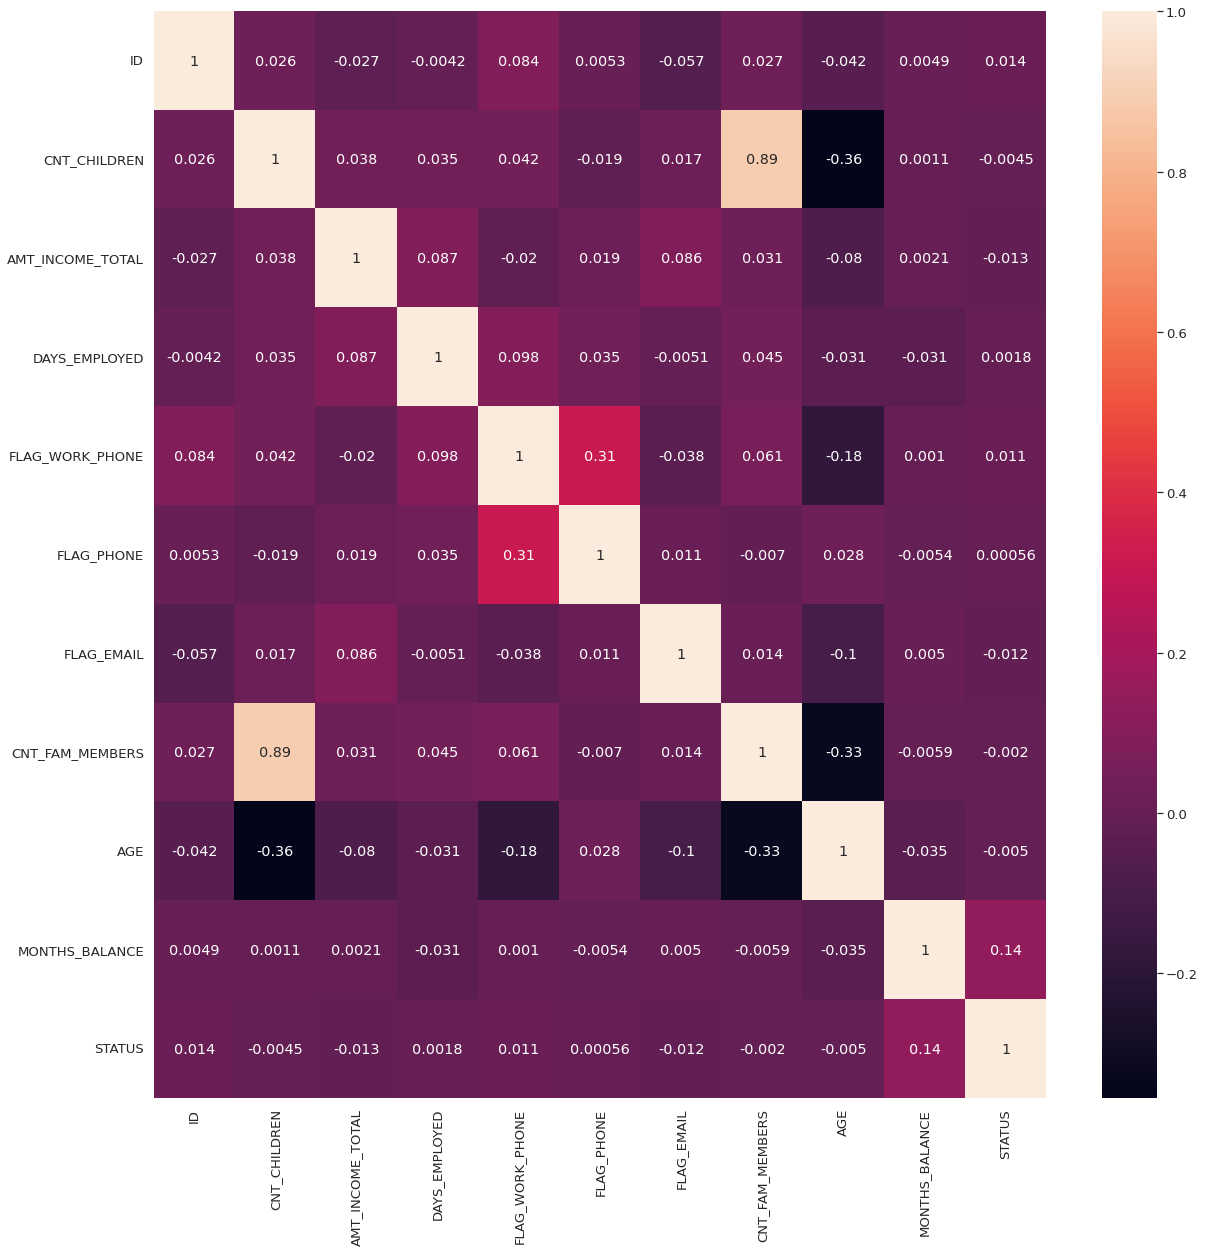

In [ ]:
#Correlation of non-category columns 
#Strong correlation between CNT_CHILDREN and CNT_FAM_MEMBERS->keep only CNT_FAM_MEMBERS
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(rc={'figure.figsize':[20,20]},font_scale=1.2)
sns.heatmap(X_train.corr(),annot=True)
plt.show()

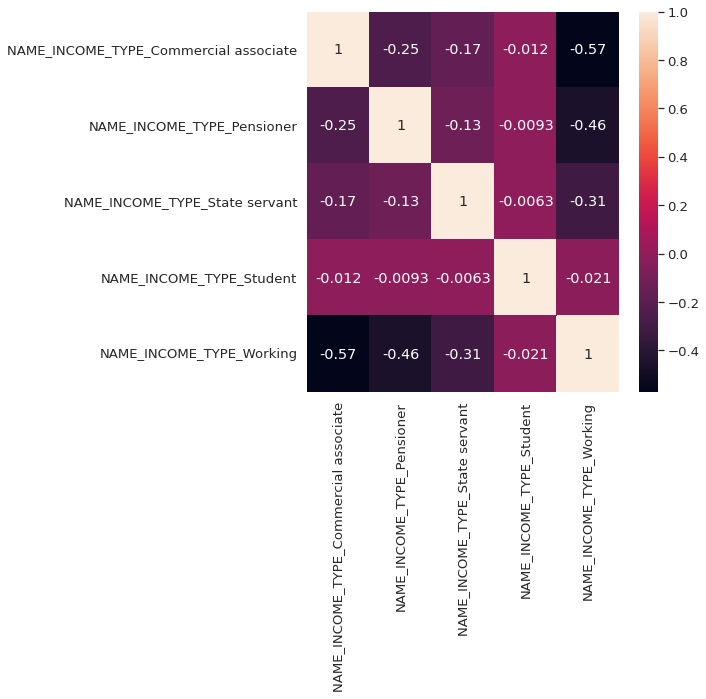

In [ ]:
#Correlation between Commercial associate and Working ->regroup to Working
import seaborn as sns;sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
income = pd.DataFrame(X_train["NAME_INCOME_TYPE"])
income = pd.get_dummies(income, columns=['NAME_INCOME_TYPE'])
sns.heatmap(income.corr(),annot=True)
plt.show()

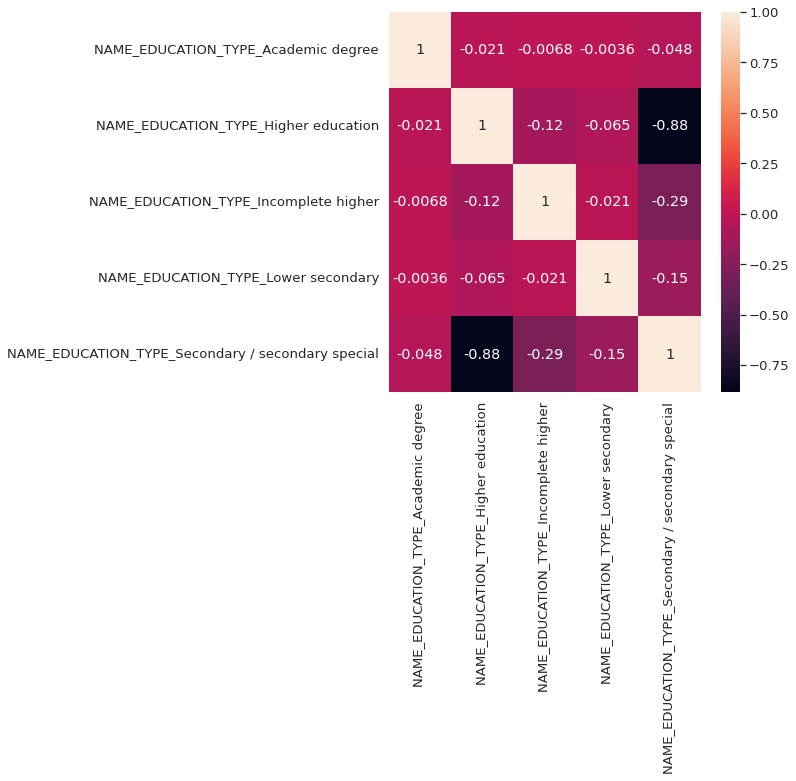

In [ ]:
#Strong correlation between Secondary/secondary special and Higher education -> regroup to Higher education
education = pd.DataFrame(X_train['NAME_EDUCATION_TYPE'])
education = pd.get_dummies(education, columns=['NAME_EDUCATION_TYPE'])
sns.heatmap(education.corr(),annot=True)
plt.show()

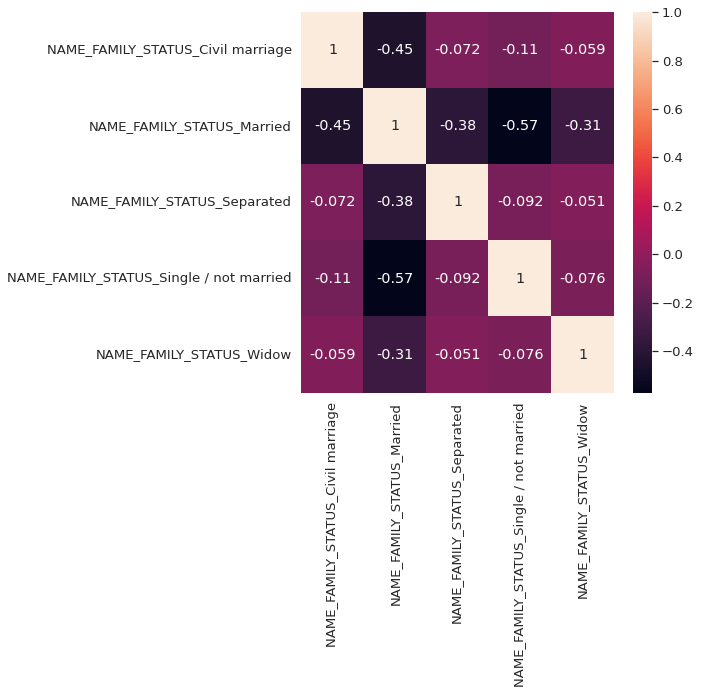

In [ ]:
#Correlation between Married and Single / not married -> regroup to Married/Single
family = pd.DataFrame(X_train['NAME_FAMILY_STATUS'])
family = pd.get_dummies(family, columns=['NAME_FAMILY_STATUS'])
sns.heatmap(family.corr(),annot=True)
plt.show()

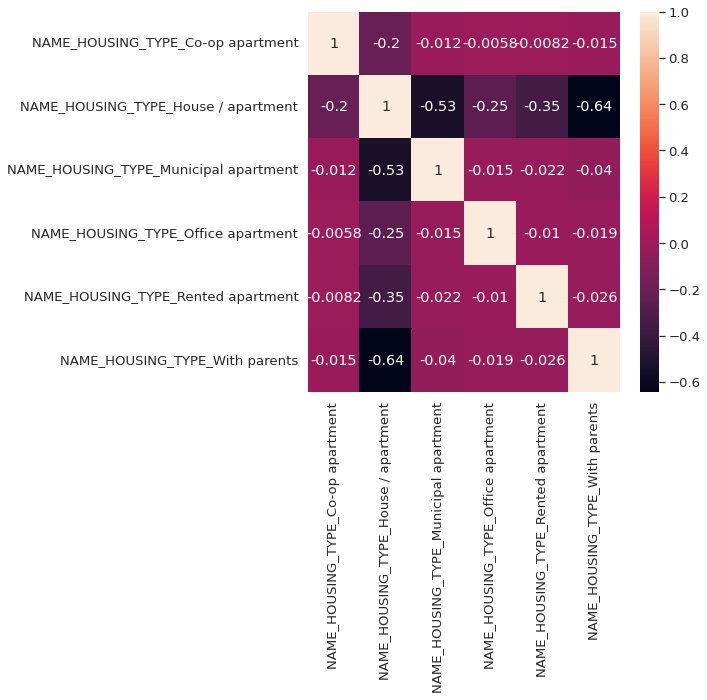

In [ ]:
#Correlation between With parents and House / apartment 
#Correlation between House / apartment and Municipal apartment 
#Group With parents, House/apartment and Municipal apartment together -> regroup to House
housing = pd.DataFrame(X_train['NAME_HOUSING_TYPE'])
housing = pd.get_dummies(housing, columns=['NAME_HOUSING_TYPE'])
sns.heatmap(housing.corr(),annot=True)
plt.show()

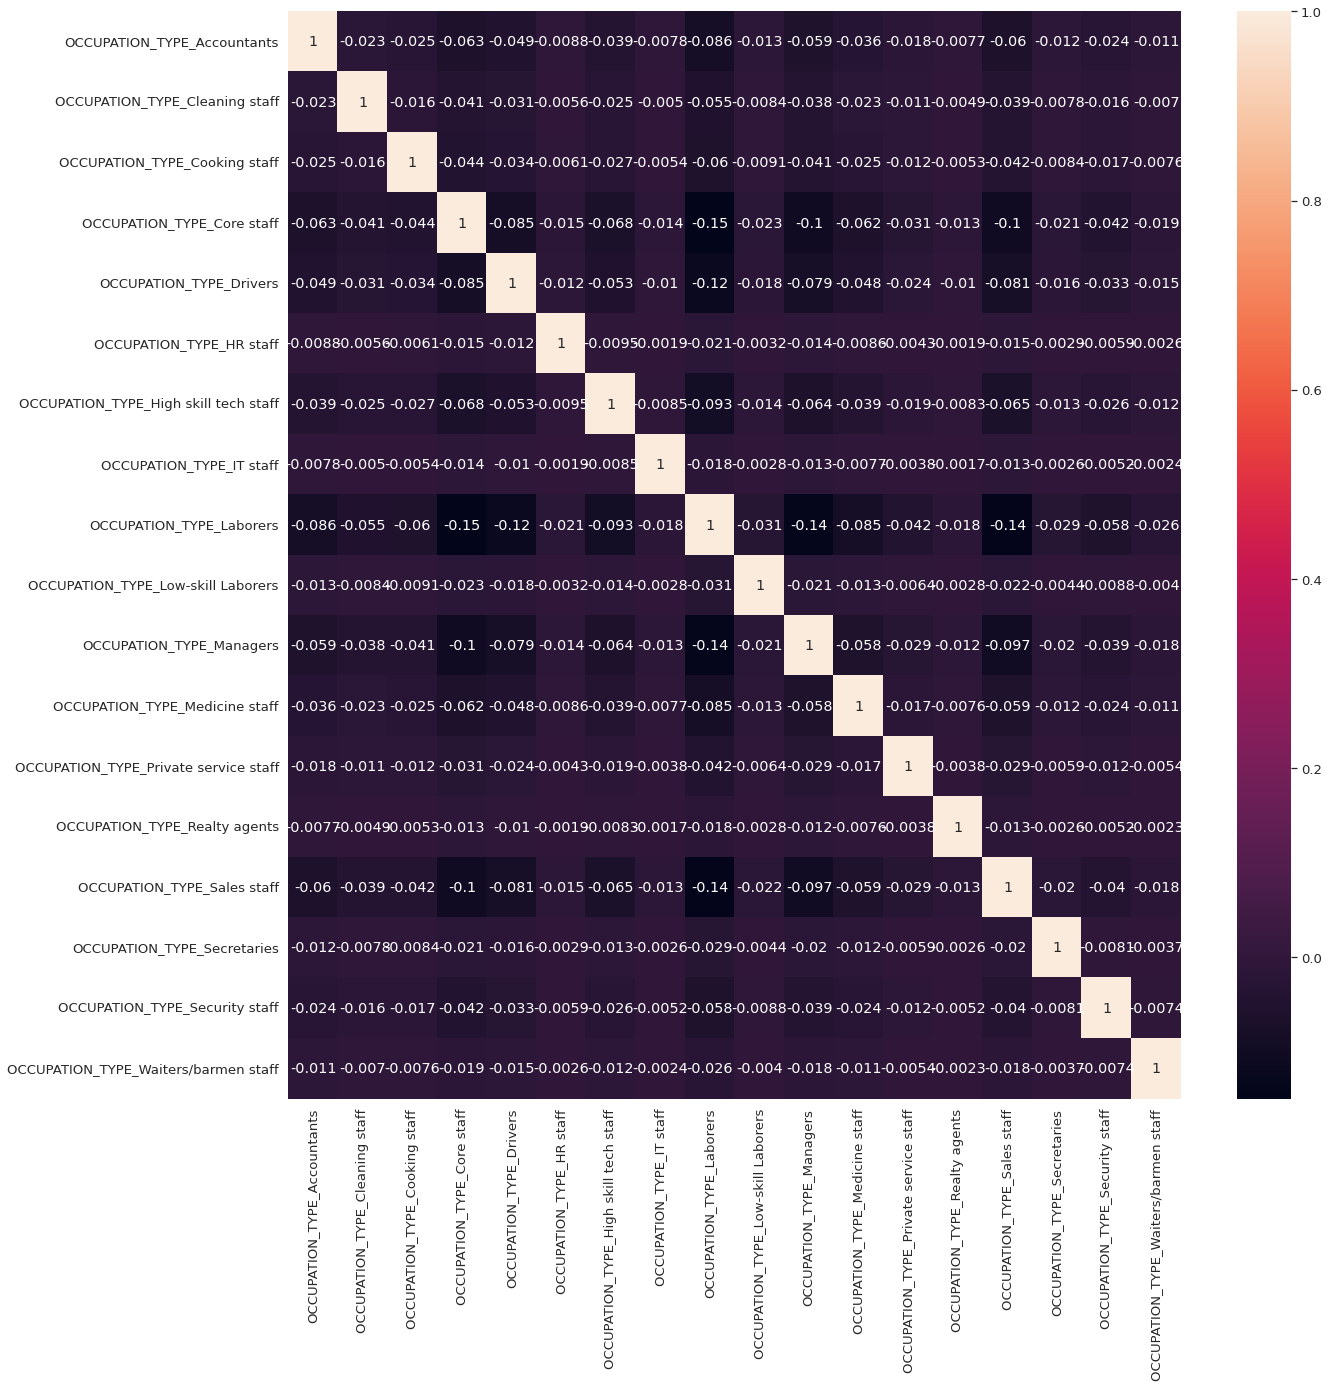

In [ ]:
#No correlation
import seaborn as sns;sns.set(rc={'figure.figsize':[20,20]},font_scale=1.2)
occupation = pd.DataFrame(X_train['OCCUPATION_TYPE'])
occupation = pd.get_dummies(occupation, columns=['OCCUPATION_TYPE'])
sns.heatmap(occupation.corr(),annot=True)
plt.show()

Helper function to group data

In [ ]:

#categorise income type into 4 groups 
def income_type(income):
    if income in ("Commercial associate", "Working"):
        return "Working"
    return income

#categorise edu_level into 4 groups 
def edu_level(edu):
    if edu in ("Higher education", "Secondary / secondary special"):
        return "Higher education"
    return edu

#categorise fam status into 4 groups 
def fam_status(fam):
    if fam in ("Single / not married", "Married"):
        return "Married/Single"
    return fam

#categorise housing into 4 groups 
def housing(house):
    if house in ("With parents", "House / apartment", "Municipal apartment"):
        return "House"
    else:
        return house





In [ ]:
#Regroup income types into 4 groups 
merged_df['NAME_INCOME_TYPE'] = merged_df['NAME_INCOME_TYPE'].apply(income_type)

#Regroup edu type into 4 groups
merged_df['NAME_EDUCATION_TYPE'] = merged_df['NAME_EDUCATION_TYPE'].apply(edu_level)

#Regroup fam status into 4 groups
merged_df['NAME_FAMILY_STATUS'] = merged_df['NAME_FAMILY_STATUS'].apply(fam_status)

#Regroup housing into 3 groups 
merged_df['NAME_HOUSING_TYPE'] = merged_df['NAME_HOUSING_TYPE'].apply(housing)

#Drop CNT_CHILDREN since it is highly correlated to CNT_FAM_MEMBERS
merged_df.drop("CNT_CHILDREN", inplace=True, axis=1)

In [ ]:
merged_df = pd.get_dummies(merged_df, columns=['NAME_INCOME_TYPE'])
merged_df = pd.get_dummies(merged_df, columns=['NAME_EDUCATION_TYPE'])
merged_df = pd.get_dummies(merged_df, columns=['NAME_FAMILY_STATUS'])
merged_df = pd.get_dummies(merged_df, columns=['NAME_HOUSING_TYPE'])
merged_df = pd.get_dummies(merged_df, columns=['OCCUPATION_TYPE'])
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,1,1,427500.0,4542,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,5008804,0,1,1,427500.0,4542,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,5008804,0,1,1,427500.0,4542,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,5008804,0,1,1,427500.0,4542,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,5008804,0,1,1,427500.0,4542,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,0,1,112500.0,1193,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0
777711,5150337,0,0,1,112500.0,1193,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0
777712,5150337,0,0,1,112500.0,1193,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0
777713,5150337,0,0,1,112500.0,1193,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0


New X and y after grouping data

In [ ]:
# X value contains all the variables except TARGET
X = merged_df.loc[:, merged_df.columns != "TARGET"]
# y is the TARGET
y = merged_df.loc[:, merged_df.columns == "TARGET"]

In [ ]:
y.value_counts()

TARGET
0         774887
1           2828
dtype: int64

In [ ]:
# we create the test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

In [ ]:
# we have now fit and transform the data into a scaler for accurate reading and results.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pct = pca.fit_transform(X_scaled)
print(np.round(pca.explained_variance_ratio_,decimals=3))
print('3 components explaining: ',sum(pca.explained_variance_ratio_[:3]))
print('4 components explaining: ',sum(pca.explained_variance_ratio_[:4]))
print('5 components explaining: ',sum(pca.explained_variance_ratio_[:5]))
print('6 components explaining: ',sum(pca.explained_variance_ratio_[:6]))
print('7 components explaining: ',sum(pca.explained_variance_ratio_[:7]))
print('8 components explaining: ',sum(pca.explained_variance_ratio_[:8]))
print('9 components explaining: ',sum(pca.explained_variance_ratio_[:9]))
print('10 components explaining: ',sum(pca.explained_variance_ratio_[:10]))
print('11 components explaining: ',sum(pca.explained_variance_ratio_[:11]))
print('12 components explaining: ',sum(pca.explained_variance_ratio_[:12]))
print('13 components explaining: ',sum(pca.explained_variance_ratio_[:13]))
print('14 components explaining: ',sum(pca.explained_variance_ratio_[:14]))
print('15 components explaining: ',sum(pca.explained_variance_ratio_[:15]))
print('16 components explaining: ',sum(pca.explained_variance_ratio_[:16]))
print('17 components explaining: ',sum(pca.explained_variance_ratio_[:17]))
print('18 components explaining: ',sum(pca.explained_variance_ratio_[:18]))
print('19 components explaining: ',sum(pca.explained_variance_ratio_[:19]))
print('20 components explaining: ',sum(pca.explained_variance_ratio_[:20]))
print('21 components explaining: ',sum(pca.explained_variance_ratio_[:21]))
print('22 components explaining: ',sum(pca.explained_variance_ratio_[:22]))
print('23 components explaining: ',sum(pca.explained_variance_ratio_[:23]))
print('24 components explaining: ',sum(pca.explained_variance_ratio_[:24]))
print('25 components explaining: ',sum(pca.explained_variance_ratio_[:25]))
print('26 components explaining: ',sum(pca.explained_variance_ratio_[:26]))
print('27 components explaining: ',sum(pca.explained_variance_ratio_[:27]))
print('28 components explaining: ',sum(pca.explained_variance_ratio_[:28]))
print('29 components explaining: ',sum(pca.explained_variance_ratio_[:29]))
print('30 components explaining: ',sum(pca.explained_variance_ratio_[:30]))
print('31 components explaining: ',sum(pca.explained_variance_ratio_[:31]))
print('32 components explaining: ',sum(pca.explained_variance_ratio_[:32]))
print('33 components explaining: ',sum(pca.explained_variance_ratio_[:33]))
print('34 components explaining: ',sum(pca.explained_variance_ratio_[:34]))
print('35 components explaining: ',sum(pca.explained_variance_ratio_[:35]))
print('36 components explaining: ',sum(pca.explained_variance_ratio_[:36]))
print('37 components explaining: ',sum(pca.explained_variance_ratio_[:37]))
print('38 components explaining: ',sum(pca.explained_variance_ratio_[:38]))
print('39 components explaining: ',sum(pca.explained_variance_ratio_[:39]))
print('40 components explaining: ',sum(pca.explained_variance_ratio_[:40]))
print('41 components explaining: ',sum(pca.explained_variance_ratio_[:41]))
print('42 components explaining: ',sum(pca.explained_variance_ratio_[:42]))
print('43 components explaining: ',sum(pca.explained_variance_ratio_[:43]))
print('44 components explaining: ',sum(pca.explained_variance_ratio_[:44]))
print('45 components explaining: ',sum(pca.explained_variance_ratio_[:45]))
print('46 components explaining: ',sum(pca.explained_variance_ratio_[:46]))
print('47 components explaining: ',sum(pca.explained_variance_ratio_[:47]))

[0.068 0.043 0.042 0.042 0.037 0.034 0.03  0.029 0.027 0.025 0.024 0.024
 0.023 0.023 0.023 0.022 0.022 0.022 0.022 0.022 0.022 0.021 0.021 0.021
 0.021 0.021 0.021 0.021 0.021 0.02  0.02  0.019 0.019 0.018 0.018 0.017
 0.016 0.015 0.014 0.012 0.01  0.007 0.003 0.    0.    0.    0.   ]
3 components explaining:  0.15336176370548243
4 components explaining:  0.1949853396572235
5 components explaining:  0.2316238816820672
6 components explaining:  0.2653284519903927
7 components explaining:  0.29503471905756473
8 components explaining:  0.3242378281080085
9 components explaining:  0.35154923945553346
10 components explaining:  0.3763201532466464
11 components explaining:  0.4006180801848381
12 components explaining:  0.4245712331814071
13 components explaining:  0.4478999225484415
14 components explaining:  0.47088240205712134
15 components explaining:  0.4937298468186852
16 components explaining:  0.5161160871466366
17 components explaining:  0.5383863044484515
18 components explaining: 

In [ ]:
pca = PCA(n_components=30)
X_scaled = pca.fit_transform(X_scaled)
X_test_scaled = pca.transform(X_test_scaled)

In [ ]:
#balancing for the training data 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_balanced, y_balanced = rus.fit_resample(X_scaled, y_train)

In [ ]:
y_test.value_counts()

TARGET
0         232474
1            841
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
# !pip install pydotplus
# import pydotplus
from IPython.display import Image
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from random import uniform
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
from sklearn import metrics 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

Logistic Regression Model

In [ ]:
logreg = LogisticRegression(solver='liblinear',random_state = 0) 
logreg.fit(X_balanced,np.ravel(y_balanced))
y_pred = logreg.predict(X_test_scaled) 


Text(0.5, 1271.2, 'Predicted label')

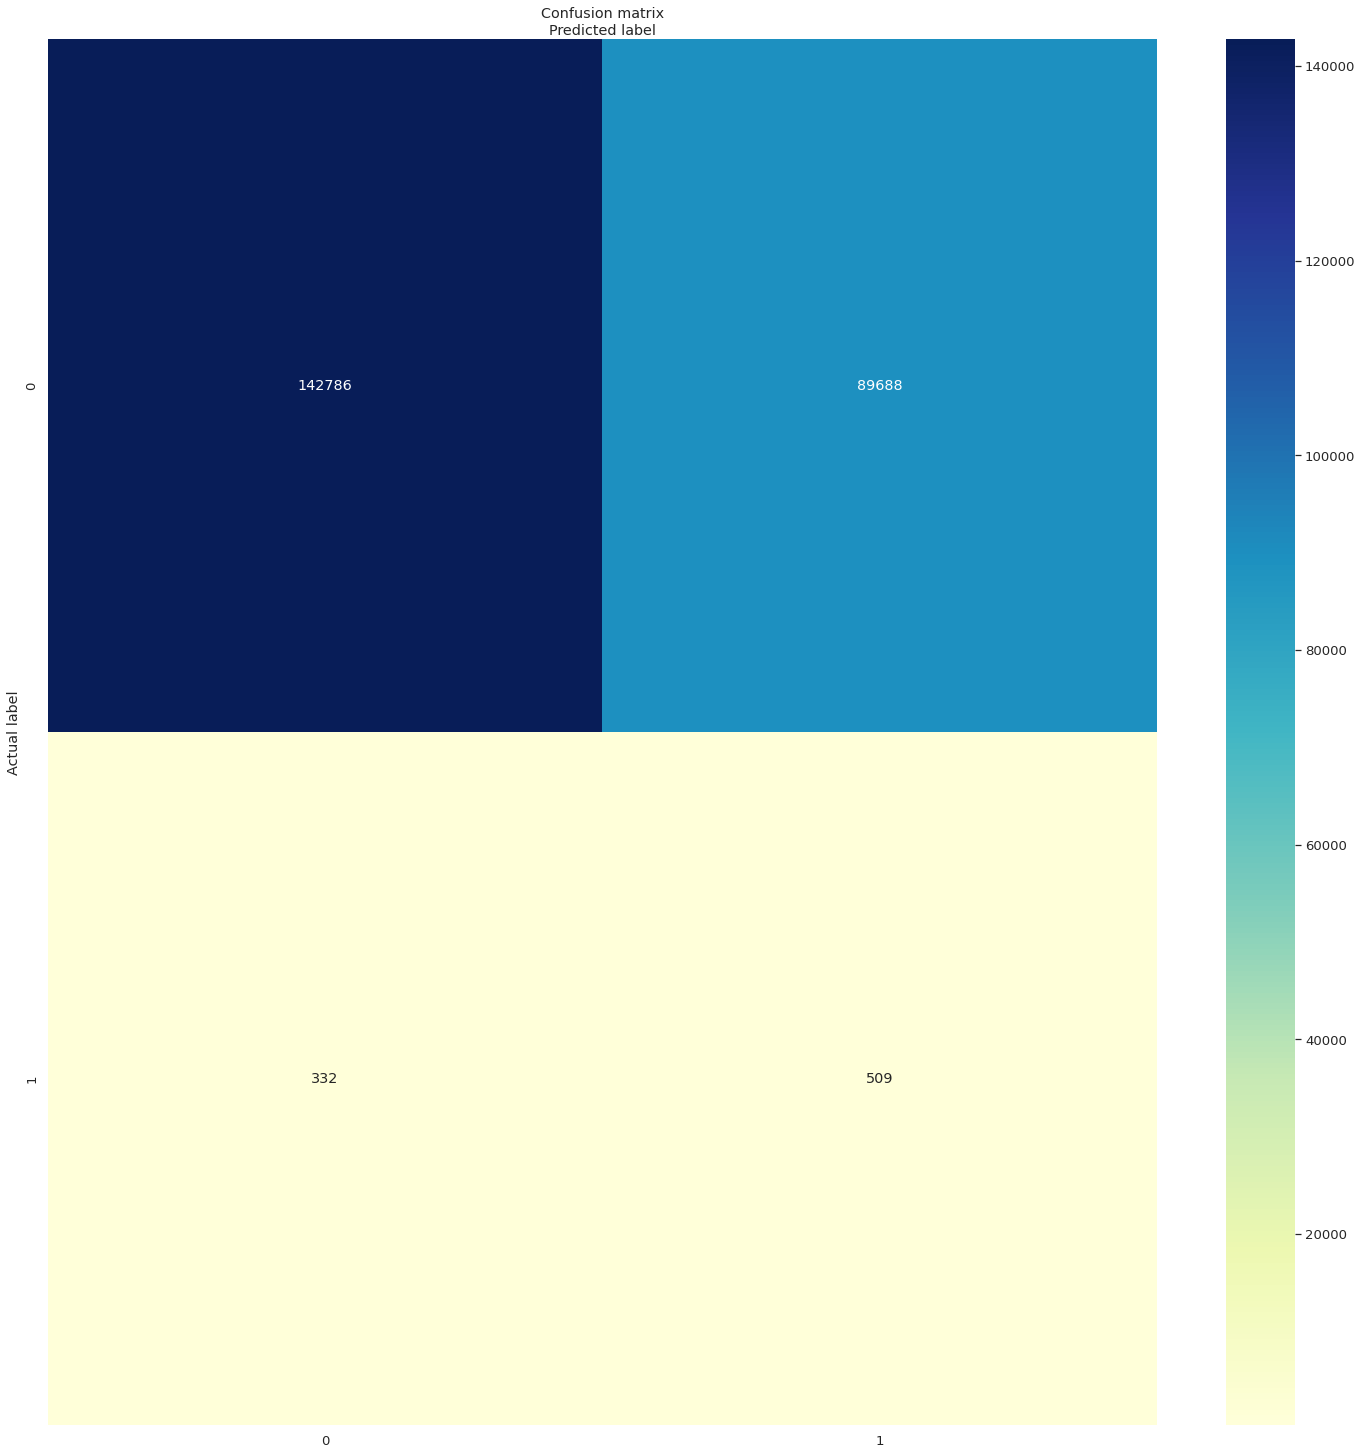

In [ ]:
target_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(target_names)) 
plt.xticks(tick_marks, target_names) 
plt.yticks(tick_marks, target_names) 

# create heatmap 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy = " + str(accuracy))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 Score = " + str(f1))

Accuracy = 0.6141696847609455
Precision = 0.005643203210749803
Recall = 0.6052318668252081
F1 Score = 0.011182143720204749


k-fold cross validation (to select the best model):

In [ ]:
svc1 = SVC(kernel='linear')
cross_val_score_1=cross_val_score(svc1, X_scaled, np.ravel(y_train), cv=5)

#analysis of cv score:
print("%0.10f accuracy with a standard deviation of %0.10f" % (cross_val_score_1.mean(), cross_val_score_1.std()))

In [ ]:
svc2 = SVC(kernel='poly')
cross_val_score_2=cross_val_score(svc2, X_scaled, np.ravel(y_train), cv=5)

#analysis of cv score:
print("%0.10f accuracy with a standard deviation of %0.10f" % (cross_val_score_2.mean(), cross_val_score_2.std()))


NameError: ignored

In [ ]:
svc3 = SVC(kernel='rbf')
cross_val_score_3=cross_val_score(svc3, X_scaled, np.ravel(y_train), cv=5)

#analysis of cv score:
print("%0.10f accuracy with a standard deviation of %0.10f" % (cross_val_score_3.mean(), cross_val_score_3.std()))



In [ ]:
svc4 = SVC(kernel='sigmoid')
cross_val_score_4=cross_val_score(svc4, X_scaled, np.ravel(y_train), cv=5)

#analysis of cv score:
print("%0.10f accuracy with a standard deviation of %0.10f" % (cross_val_score_4.mean(), cross_val_score_4.std()))


              precision    recall  f1-score   support

           0       0.49      0.45      0.47       396
           1       0.49      0.52      0.50       396

    accuracy                           0.49       792
   macro avg       0.49      0.49      0.49       792
weighted avg       0.49      0.49      0.49       792

0.48 accuracy with a standard deviation of 0.01


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
tempX = X_scaled
tempY = y_train
tempY = tempY.to_numpy().ravel()
skf = RepeatedStratifiedKFold(n_splits=4, n_repeats = 2, random_state = 0)
skf.get_n_splits(tempX, tempY)
lst_accu_stratified = {}
kernels = ["linear", "poly", "rbf", "sigmoid"]

for curr_kernel in kernels:
  for train_index, test_index in skf.split(tempX, tempY):
    x_train_fold, x_test_fold = tempX[train_index], tempX[test_index]
    y_train_fold, y_test_fold = tempY[train_index], tempY[test_index]
    balanced_x_train_fold, balanced_y_train_fold = rus.fit_resample(tempX[train_index], tempY[train_index])
    tempSvc = SVC(kernel=curr_kernel)
    model = tempSvc.fit(balanced_x_train_fold, balanced_y_train_fold)
    prediction = model.predict(x_test_fold)
    if curr_kernel not in lst_accu_stratified:
      lst_accu_stratified.update({curr_kernel: [tempSvc.score(x_test_fold, y_test_fold)]})
    else:
      lst_accu_stratified[curr_kernel].append(tempSvc.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)

linear_accuracy = np.array(lst_accu_stratified["linear"])
poly_accuracy = np.array(lst_accu_stratified["poly"])
rbf_accuracy = np.array(lst_accu_stratified["rbf"])
sigmoid_accuracy = np.array(lst_accu_stratified["sigmoid"])

print("%0.5f accuracy with a standard deviation of %0.5f" % (linear_accuracy.mean(), linear_accuracy.std()))
print("%0.5f accuracy with a standard deviation of %0.5f" % (poly_accuracy.mean(), poly_accuracy.std()))
print("%0.5f accuracy with a standard deviation of %0.5f" % (rbf_accuracy.mean(), rbf_accuracy.std()))
print("%0.5f accuracy with a standard deviation of %0.5f" % (sigmoid_accuracy.mean(), sigmoid_accuracy.std()))

Conclusion: poly model performs the best out of all models, consistently having the highest score for accuracy out of all models

Running model on actual testing set

In [ ]:
svc_final = SVC(kernel='poly', random_state = 0)
model = svc_final.fit(X_balanced, np.ravel(y_balanced))
prediction = svc_final.predict(X_test_scaled)
print(classification_report(np.ravel(y_test), prediction))
accuracy = accuracy_score(np.ravel(y_test), prediction)
precision = precision_score(np.ravel(y_test), prediction)
recall = recall_score(np.ravel(y_test), prediction)
f1 = f1_score(np.ravel(y_test), prediction)

print("Accuracy = " + str(accuracy))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 Score = " + str(f1))
# #performance of model (accuracy):
# overall_accuracy = model.score(X_test_balanced, np.ravel(y_test_balanced))
# print("%0.2f accuracy" % (overall_accuracy))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    232474
           1       0.01      0.54      0.02       841

    accuracy                           0.80    233315
   macro avg       0.50      0.67      0.46    233315
weighted avg       0.99      0.80      0.89    233315

Accuracy = 0.8041146090049932
Precision = 0.00994057502403216
Recall = 0.5410225921521997
F1 Score = 0.01952245081844121


Decision Tree Model

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 0)
decision_tree.fit(X_balanced, y_balanced)
y_predict = decision_tree.predict(X_test_scaled)


Text(0.5, 1271.2, 'Predicted label')

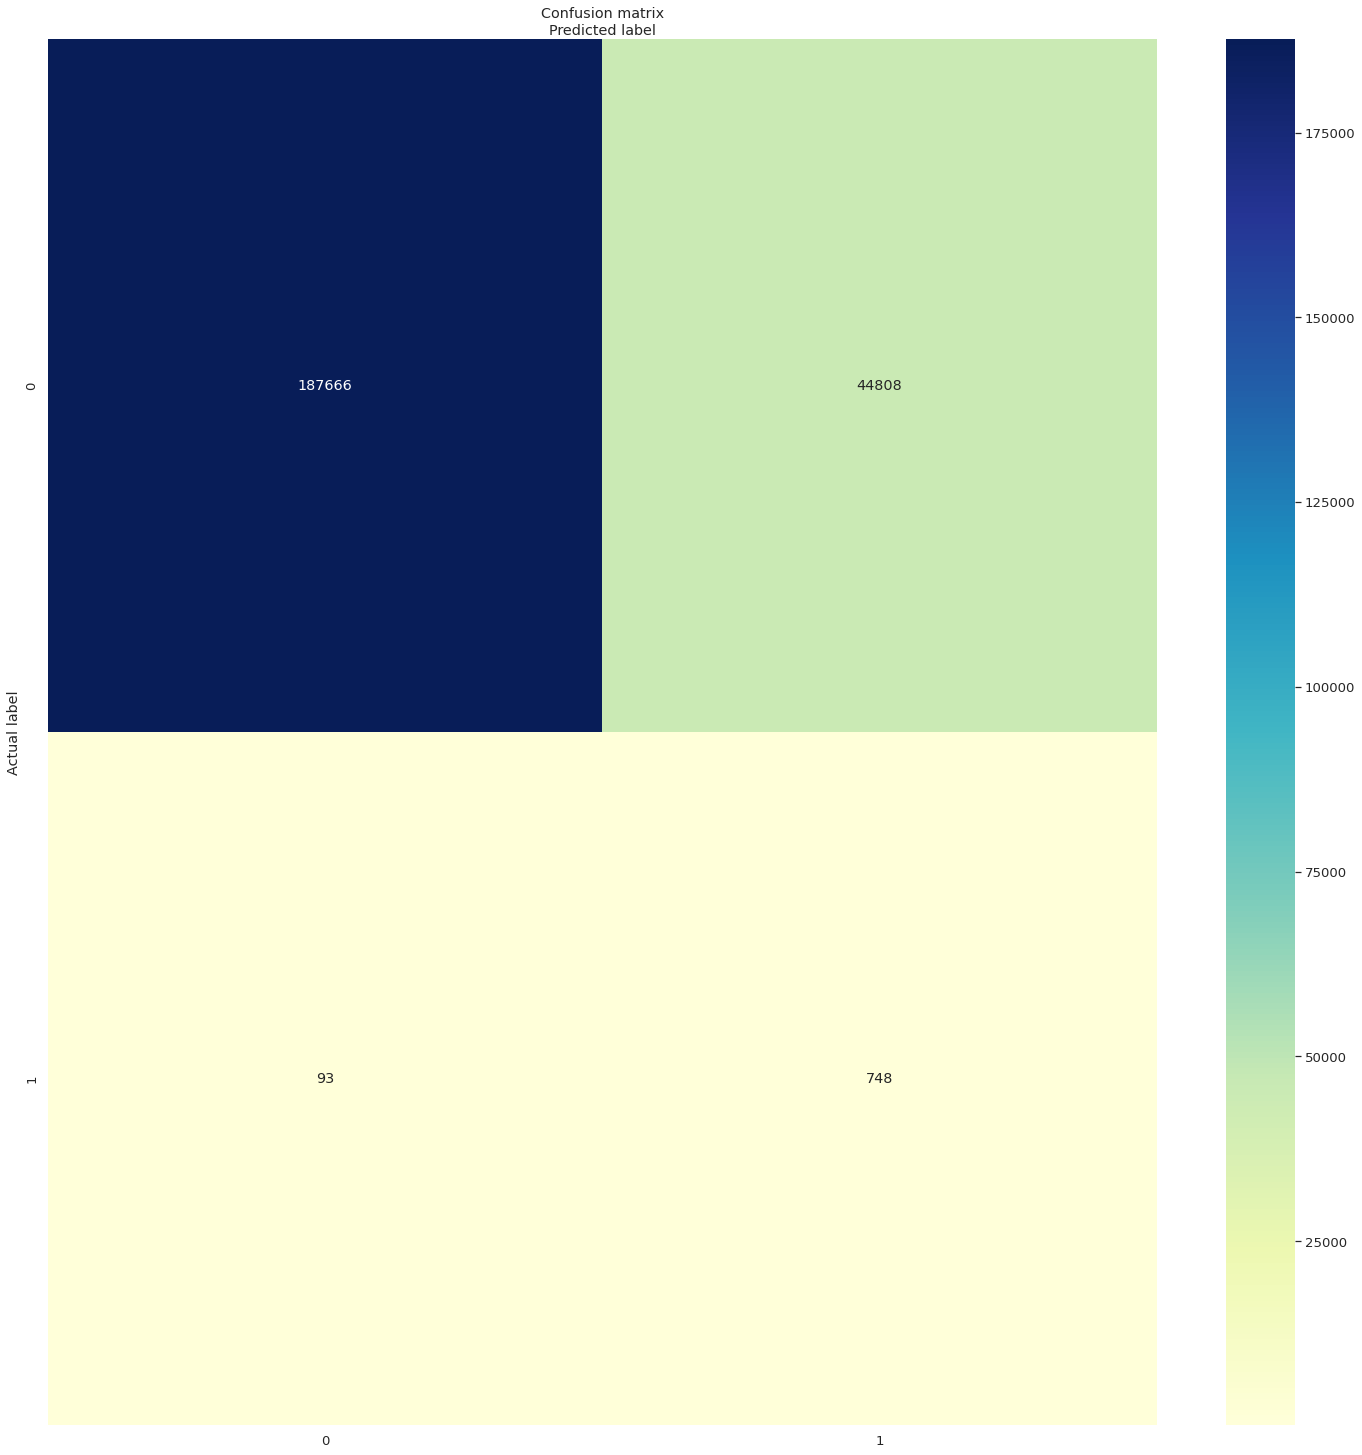

In [ ]:
target_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(target_names)) 
plt.xticks(tick_marks, target_names) 
plt.yticks(tick_marks, target_names) 

# create heatmap 
cnf_matrix = metrics.confusion_matrix(y_test, y_predict) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')


In [ ]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)


print("Accuracy = " + str(accuracy))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 Score = " + str(f1))

Accuracy = 0.8075520219445813
Precision = 0.01641935200632189
Recall = 0.8894173602853745
F1 Score = 0.03224346401707007


Random forest

In [ ]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X_balanced,np.ravel(y_balanced))
y_predict = random_forest.predict(X_test_scaled)

Text(0.5, 1271.2, 'Predicted label')

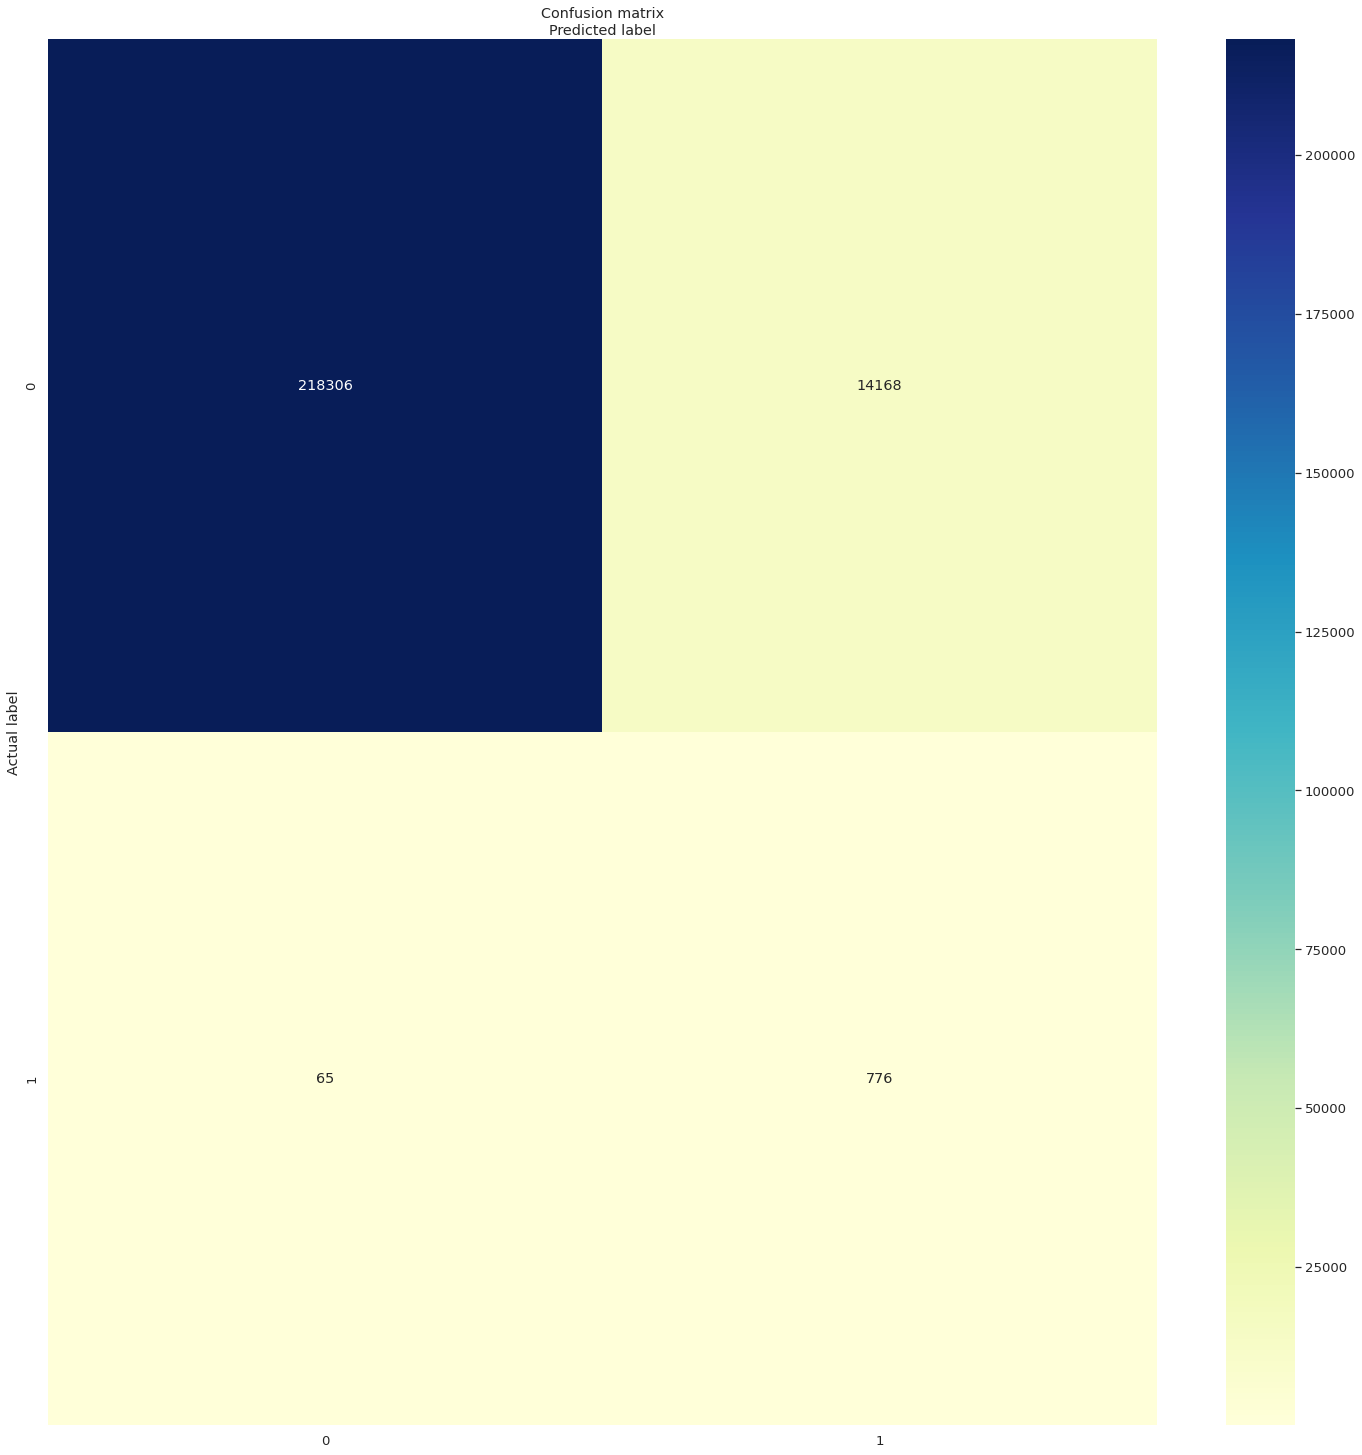

In [ ]:
target_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(target_names)) 
plt.xticks(tick_marks, target_names) 
plt.yticks(tick_marks, target_names) 

# create heatmap 
cnf_matrix = metrics.confusion_matrix(y_test, y_predict) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Accuracy = " + str(accuracy))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 Score = " + str(f1))

Accuracy = 0.9389966354499282
Precision = 0.05192719486081371
Recall = 0.9227110582639715
F1 Score = 0.09832119100411783
